<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"><li><span><a href="#Intro-to-Pytorch" data-toc-modified-id="Intro-to-Pytorch-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Intro to Pytorch</a></span><ul class="toc-item"><li><span><a href="#Pytorch-tensors" data-toc-modified-id="Pytorch-tensors-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Pytorch tensors</a></span></li><li><span><a href="#Pytorch-Autograd" data-toc-modified-id="Pytorch-Autograd-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Pytorch Autograd</a></span></li><li><span><a href="#torch.nn-module" data-toc-modified-id="torch.nn-module-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>torch.nn module</a></span></li></ul></li><li><span><a href="#Linear-Regression-with-Pytorch" data-toc-modified-id="Linear-Regression-with-Pytorch-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Linear Regression with Pytorch</a></span><ul class="toc-item"><li><span><a href="#Gradient-Descent-with-Pytorch" data-toc-modified-id="Gradient-Descent-with-Pytorch-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Gradient Descent with Pytorch</a></span></li><li><span><a href="#Simplified-GD-Loop" data-toc-modified-id="Simplified-GD-Loop-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Simplified GD Loop</a></span></li></ul></li><li><span><a href="#Text-Classification" data-toc-modified-id="Text-Classification-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Text Classification</a></span><ul class="toc-item"><li><span><a href="#Subjectivity-Dataset" data-toc-modified-id="Subjectivity-Dataset-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Subjectivity Dataset</a></span></li><li><span><a href="#Tokenization" data-toc-modified-id="Tokenization-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Tokenization</a></span><ul class="toc-item"><li><span><a href="#Simple-Tokenization" data-toc-modified-id="Simple-Tokenization-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>Simple Tokenization</a></span></li><li><span><a href="#Much-better-tokenization-with-Spacy" data-toc-modified-id="Much-better-tokenization-with-Spacy-3.2.2"><span class="toc-item-num">3.2.2&nbsp;&nbsp;</span>Much better tokenization with Spacy</a></span></li></ul></li><li><span><a href="#Split-dataset-in-train-and-test" data-toc-modified-id="Split-dataset-in-train-and-test-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Split dataset in train and test</a></span></li><li><span><a href="#Word-to-index-mapping" data-toc-modified-id="Word-to-index-mapping-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Word to index mapping</a></span></li><li><span><a href="#Sentence-encoding" data-toc-modified-id="Sentence-encoding-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Sentence encoding</a></span></li><li><span><a href="#Embedding-layer" data-toc-modified-id="Embedding-layer-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Embedding layer</a></span></li><li><span><a href="#Continuous-Bag-of-Words-Model" data-toc-modified-id="Continuous-Bag-of-Words-Model-3.7"><span class="toc-item-num">3.7&nbsp;&nbsp;</span>Continuous Bag of Words Model</a></span></li></ul></li><li><span><a href="#Training-the-CBOW-model" data-toc-modified-id="Training-the-CBOW-model-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Training the CBOW model</a></span></li><li><span><a href="#Data-loaders-for-SGD" data-toc-modified-id="Data-loaders-for-SGD-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Data loaders for SGD</a></span></li><li><span><a href="#References" data-toc-modified-id="References-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>References</a></span></li></ul></div>

In [2]:
# import pytorch libraries
%matplotlib inline
import torch 
import torch.autograd as autograd 
import torch.nn as nn 
import torch.nn.functional as F
import torch.optim as optim
import numpy as np

# Intro to Pytorch

PyTorch consists of 4 main packages:
* torch: a general purpose array library similar to Numpy that can do computations on GPU
* torch.autograd: a package for automatically obtaining gradients
* torch.nn: a neural net library with common layers and cost functions
* torch.optim: an optimization package with common optimization algorithms like SGD, Adam, etc

## Pytorch tensors
Like Numpy tensors but can utilize GPUs to accelerate its numerical computations. 

In [3]:
# Create random tensor
N = 5
x = torch.randn(N, 10).type(torch.FloatTensor)

In [4]:
x

tensor([[ 0.0914, -0.2027,  0.3454,  1.1804, -1.0379, -0.9649,  0.1134,
         -0.0304,  0.7949,  2.2304],
        [-1.0587,  1.3027,  0.0312,  0.8068,  1.5800, -0.1484,  0.6871,
         -0.7192, -0.5203, -0.7568],
        [ 0.3268,  2.0536,  1.4238,  0.1561, -0.8983,  1.0927, -0.4093,
         -0.2868, -0.0500, -1.6242],
        [-0.3553,  0.1969,  0.5283,  0.2715, -1.4301, -0.4680,  0.6810,
          1.1267,  0.7061,  1.1374],
        [ 0.7028,  1.6394, -0.3146, -0.9717,  0.2393, -0.2749,  0.3586,
          0.3045,  0.9169,  0.4195]])

In [5]:
x.shape

torch.Size([5, 10])

In [6]:
# reshaping of tensors using .view()
x.view(1,-1) #-1 makes torch infer the second dim

tensor([[ 0.0914, -0.2027,  0.3454,  1.1804, -1.0379, -0.9649,  0.1134,
         -0.0304,  0.7949,  2.2304, -1.0587,  1.3027,  0.0312,  0.8068,
          1.5800, -0.1484,  0.6871, -0.7192, -0.5203, -0.7568,  0.3268,
          2.0536,  1.4238,  0.1561, -0.8983,  1.0927, -0.4093, -0.2868,
         -0.0500, -1.6242, -0.3553,  0.1969,  0.5283,  0.2715, -1.4301,
         -0.4680,  0.6810,  1.1267,  0.7061,  1.1374,  0.7028,  1.6394,
         -0.3146, -0.9717,  0.2393, -0.2749,  0.3586,  0.3045,  0.9169,
          0.4195]])

In [7]:
x.view(1,-1).shape

torch.Size([1, 50])

## Pytorch Autograd
The autograd package in PyTorch provides classes and functions implementing automatic differentiation of arbitrary scalar valued function. For example, the gradient of the error with respect to all parameters.

In order for this to happen we need to declare our paramerers as Tensors with the requires_grad=True keyword. Here is an example:

In [16]:
x = torch.tensor([1., 2., 3., 4., 5., 6.], requires_grad=True)

In [17]:
x.grad

In [21]:
L = (2*x+1).sum()
L

tensor(48.)

In [19]:
L.backward() # computes the grad of L with respect to x

In [20]:
x.grad

tensor([  4.,   8.,  12.,  16.,  20.,  24.])

## torch.nn module
A neural net library with common layers and cost functions

In [23]:
# linear transformation of a Nx5 matrix into a Nx3 matrix, where N can be anything 
# (number of observations)
D = 5 # number of input featutes
M = 3 # neurons in the first hidden layer
linear_map = nn.Linear(D, M)

In [24]:
# parameters are initialized randomly
[p for p in linear_map.parameters()]

[Parameter containing:
 tensor([[ 0.2340, -0.0232,  0.2809, -0.2814,  0.1276],
         [-0.3092,  0.3024, -0.3376,  0.0709, -0.1189],
         [-0.2113,  0.4269,  0.0935, -0.3236, -0.0266]]), Parameter containing:
 tensor([ 0.4465,  0.4240,  0.0164])]

#  Linear Regression with Pytorch

The goal of linear regression is to fit a line to a set of points.

In [25]:
# Here we generate some fake data
def lin(a,b,x): return a*x+b

def gen_fake_data(n, a, b):
    x = np.random.uniform(0,1,n) 
    y = lin(a,b,x) + 0.1 * np.random.normal(0,3,n)
    return x, y

x, y = gen_fake_data(50, 3., 8.)

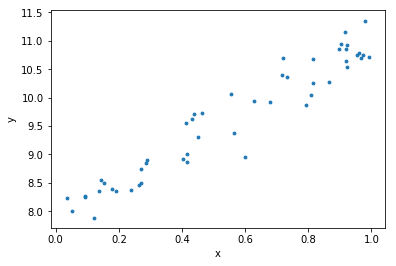

In [26]:
import matplotlib.pyplot as plt
plt.scatter(x,y, s=8); plt.xlabel("x"); plt.ylabel("y"); 

You want to find **parameters** (weights) $a$ and $b$ such that you minimize the *error* between the points and the line $a\cdot x + b$. Note that here $a$ and $b$ are unknown. For a regression problem the most common *error function* or *loss function* is the **mean squared error**. 

In [27]:
def mse(y_hat, y): return ((y_hat - y) ** 2).mean()

Suppose we believe $a = 10$ and $b = 5$ then we can compute `y_hat` which is our *prediction* and then compute our error.

In [28]:
y_hat = lin(10,5,x)
mse(y_hat, y)

5.645114810362771

In [29]:
def mse_loss(a, b, x, y): return mse(lin(a,b,x), y)

In [30]:
mse_loss(10, 5, x, y)

5.645114810362771

So far we have specified the *model* (linear regression) and the *evaluation criteria* (or *loss function*). Now we need to handle *optimization*; that is, how do we find the best values for $a$ and $b$? How do we find the best *fitting* linear regression.

## Gradient Descent with Pytorch

For a fixed dataset $x$ and $y$ `mse_loss(a,b)` is a function of $a$ and $b$. We would like to find the values of $a$ and $b$ that minimize that function.

**Gradient descent** is an algorithm that minimizes functions. Given a function defined by a set of parameters, gradient descent starts with an initial set of parameter values and iteratively moves toward a set of parameter values that minimize the function. This iterative minimization is achieved by taking steps in the negative direction of the function gradient.

Here is gradient descent implemented in [PyTorch](http://pytorch.org/).

In [31]:
# generate some more data
x, y = gen_fake_data(10000, 3., 8.)
x.shape, y.shape

((10000,), (10000,))

In [32]:
# Wrap x and y as tensor 
x = torch.tensor(x)
y = torch.tensor(y)

In [33]:
# Create random Tensors for weights, and wrap them in tensors.
# Setting requires_grad=True indicates that we want to compute gradients with
# respect to these tensors during the backward pass.
a, b = np.random.randn(1), np.random.randn(1)
a = torch.tensor(a, requires_grad=True)
b = torch.tensor(b, requires_grad=True)
a,b

(tensor([ 0.3550], dtype=torch.float64),
 tensor([-2.0563], dtype=torch.float64))

In [36]:
learning_rate = 1e-3
for t in range(10000):
    # Forward pass: compute predicted y using operations on Variables
    loss = mse_loss(a,b,x,y)
    if t % 1000 == 0: print(loss.item())
    
    # Computes the gradient of loss with respect to all Variables with requires_grad=True.
    # After this call a.grad and b.grad will be Variables holding the gradient
    # of the loss with respect to a and b respectively
    loss.backward()
    
    # Update a and b using gradient descent; a.data and b.data are Tensors,
    # a.grad and b.grad are Variables and a.grad.data and b.grad.data are Tensors
    a.data -= learning_rate * a.grad.data
    b.data -= learning_rate * b.grad.data
    
    # Zero the gradients
    a.grad.data.zero_()
    b.grad.data.zero_()    

0.11939771899842813
0.11309016697998701
0.10824904977466188
0.1045334378023517
0.10168166377102056
0.09949289508731965
0.09781299047422101
0.09652364476577481
0.09553405741484677
0.09477453797898056
0.09419159825878377
0.09374418545887991
0.09340079109650837
0.09313723205632488
0.09293494752496952
0.0927796918691688
0.09266053140496379
0.09256907440678527
0.0924988801307599
0.09244500523343227
0.0924036556430321
0.0923719193667504
0.09234756141731251
0.09232886641681791
0.09231451779340757
0.09230350506335602
0.09229505266902466
0.09228856536119007
0.09228358627937178
0.09227976477800577
0.09227683173267173
0.0922745805873479
0.09227285280796106
0.09227152671782533
0.0922705089287116
0.092269727764106
0.0922691282114742
0.09226866804807728
0.09226831486748827
0.09226804379740884
0.0922678357480705
0.09226767606785988
0.09226755351150087
0.09226745944811472
0.0922673872534065
0.09226733184315519
0.09226728931516302
0.09226725667444993
0.09226723162233604
0.09226721239455551
0.0922671976

KeyboardInterrupt: 

In [39]:
print(a,b)

tensor([ 2.9905], dtype=torch.float64) tensor([ 8.0064], dtype=torch.float64)


## Simplified GD Loop

In [40]:
# linear tranformation with input dimension=1 and output dimension=1
nn.Linear(1, 1)

Linear(in_features=1, out_features=1, bias=True)

In [41]:
# simple way of specifying a linear regression model
model = torch.nn.Sequential(
    nn.Linear(1, 1),
)
model

Sequential(
  (0): Linear(in_features=1, out_features=1, bias=True)
)

In [42]:
# equivalent way of specifiying the same model
class LinearRegression(nn.Module):
    def __init__(self):
        super(LinearRegression, self).__init__()
        self.lin = nn.Linear(1, 1)
        
    def forward(self, x):
        x = self.lin(x)
        return x 
model =  LinearRegression()

In [43]:
print([p for p in model.parameters()])

[Parameter containing:
tensor([[-0.6577]]), Parameter containing:
tensor(1.00000e-02 *
       [-5.6948])]


In [44]:
x, y = gen_fake_data(10000, 3., 8.)
x = torch.tensor(x).float()
y = torch.tensor(y).float()
x.shape

torch.Size([10000])

In [45]:
# you have to be careful with the dimensions that your model is expecting
x1 = torch.unsqueeze(x, 1)
x1.shape

torch.Size([10000, 1])

In [46]:
y_hat = model(x1)
print(y_hat)

tensor([[-0.6453],
        [-0.4148],
        [-0.4792],
        ...,
        [-0.4997],
        [-0.2182],
        [-0.5889]])


In [47]:
# Use the optim package to define an Optimizer that will update the weights of
# the model for us. Here we will use Adam
learning_rate = 0.1
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [48]:
for t in range(10000):
    # Forward pass: compute predicted y using operations on Variables
    y_hat = model(x1)
    loss = F.mse_loss(y_hat, y.unsqueeze(1))
    if t % 1000 == 0: print(loss.item())
       
    # Before the backward pass, use the optimizer object to zero all of the
    # gradients for the variables
    optimizer.zero_grad()
    loss.backward()
    
    # Calling the step function on an Optimizer makes an update to its
    # parameters
    optimizer.step()

98.77458953857422
0.09001322090625763
0.09000242501497269
0.09000244736671448
0.09000243246555328
0.09000243991613388
0.09000243991613388
0.09000243991613388
0.09000243991613388
0.09000246226787567


In [49]:
print([p for p in model.parameters()])

[Parameter containing:
tensor([[ 2.9968]]), Parameter containing:
tensor([ 7.9976])]


# Text Classification
In this part of the tutorial we develop a continuous bag of words (CBOW) model for a text classification task described [here]( https://people.cs.umass.edu/~miyyer/pubs/2015_acl_dan.pdf). The CBOW model was first described [here](https://arxiv.org/pdf/1301.3781.pdf)

## Subjectivity Dataset
The subjectivity dataset has 5000 subjective and 5000 objective processed sentences. To get the data:
```
wget http://www.cs.cornell.edu/people/pabo/movie-review-data/rotten_imdb.tar.gz
```

In [35]:
def unpack_dataset():
    ! wget http://www.cs.cornell.edu/people/pabo/movie-review-data/rotten_imdb.tar.gz
    ! mkdir data
    ! tar -xvf rotten_imdb.tar.gz -C data

In [36]:
#unpack_dataset()

--2019-01-15 14:09:13--  http://www.cs.cornell.edu/people/pabo/movie-review-data/rotten_imdb.tar.gz
Resolving www.cs.cornell.edu (www.cs.cornell.edu)... 132.236.207.20
Connecting to www.cs.cornell.edu (www.cs.cornell.edu)|132.236.207.20|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519599 (507K) [application/x-gzip]
Saving to: ‘rotten_imdb.tar.gz.1’

rotten_imdb.tar.gz. 100%[===================>] 507.42K  --.-KB/s    in 0.002s  

2019-01-15 14:09:14 (251 MB/s) - ‘rotten_imdb.tar.gz.1’ saved [519599/519599]

mkdir: data: File exists
x quote.tok.gt9.5000
x plot.tok.gt9.5000
x subjdata.README.1.0


In [37]:
!ls data

plot.tok.gt9.5000   quote.tok.gt9.5000  subjdata.README.1.0


In [38]:
! head -2 data/plot.tok.gt9.5000

the movie begins in the past where a young boy named sam attempts to save celebi from a hunter . 
emerging from the human psyche and showing characteristics of abstract expressionism , minimalism and russian constructivism , graffiti removal has secured its place in the history of modern art while being created by artists who are unconscious of their artistic achievements . 


In [50]:
from pathlib import Path
PATH = Path("data")
list(PATH.iterdir())

[PosixPath('data/plot.tok.gt9.5000'),
 PosixPath('data/subjdata.README.1.0'),
 PosixPath('data/quote.tok.gt9.5000')]

## Tokenization
Tokenization is the task of chopping up text into pieces, called tokens.

spaCy is an open-source software library for advanced Natural Language Processing. Here we will use it for tokenization.  

### Simple Tokenization

In [51]:
# We need each line in the file 
def read_file(path):
    """ Read file returns a list of lines.
    """
    with open(path, encoding = "ISO-8859-1") as f:
        content = f.readlines()
    return content

In [52]:
obj_lines = read_file(PATH/"plot.tok.gt9.5000")

In [53]:
obj_lines[0]

'the movie begins in the past where a young boy named sam attempts to save celebi from a hunter . \n'

In [54]:
np.array(obj_lines[0].strip().lower().split(" "))

array(['the', 'movie', 'begins', 'in', 'the', 'past', 'where', 'a',
       'young', 'boy', 'named', 'sam', 'attempts', 'to', 'save', 'celebi',
       'from', 'a', 'hunter', '.'], dtype='<U8')

### Much better tokenization with Spacy

In [27]:
#!pip install -U spacy

In [28]:
import spacy

In [29]:
# first time run this
#!python3 -m spacy download en

In [30]:
tok = spacy.load('en')

In [31]:
obj_lines = read_file(PATH/"plot.tok.gt9.5000")

In [32]:
len(obj_lines)

5000

In [33]:
obj_lines[0]

'the movie begins in the past where a young boy named sam attempts to save celebi from a hunter . \n'

In [34]:
test = tok(obj_lines[0])

In [35]:
np.array([x for x in test])

array([the, movie, begins, in, the, past, where, a, young, boy, named,
       sam, attempts, to, save, celebi, from, a, hunter, ., 
], dtype=object)

## Split dataset in train and test

In [55]:
from sklearn.model_selection import train_test_split

In [56]:
sub_content = read_file(PATH/"quote.tok.gt9.5000")
obj_content = read_file(PATH/"plot.tok.gt9.5000")
sub_content = np.array([line.strip().lower() for line in sub_content])
obj_content = np.array([line.strip().lower() for line in obj_content])
sub_y = np.zeros(len(sub_content))
obj_y = np.ones(len(obj_content))
X = np.append(sub_content, obj_content)
y = np.append(sub_y, obj_y)

In [57]:
X[0], y[0]

('smart and alert , thirteen conversations about one thing is a small gem .',
 0.0)

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [59]:
X_train[:5], y_train[:5]

(array(['will god let her fall or give her a new path ?',
        "the director's twitchy sketchbook style and adroit perspective shifts grow wearisome amid leaden pacing and indifferent craftsmanship ( most notably wretched sound design ) .",
        "welles groupie/scholar peter bogdanovich took a long time to do it , but he's finally provided his own broadside at publishing giant william randolph hearst .",
        'based on the 1997 john king novel of the same name with a rather odd synopsis : " a first novel about a seasoned chelsea football club hooligan who represents a disaffected society operating by brutal rules .',
        'yet , beneath an upbeat appearance , she is struggling desperately with the emotional and physical scars left by the attack .'],
       dtype='<U691'), array([1., 0., 0., 1., 1.]))

## Word to index mapping
In interest of time we will tokenize without spaCy. Here we will compute a vocabulary of words based on the training set and a mapping from word to an index.

In [60]:
from collections import defaultdict

In [61]:
def get_vocab(content):
    """Computes Dict of counts of words.
    
    Computes the number of times a word is on a document.
    """
    vocab = defaultdict(float)
    for line in content:
        words = set(line.split())
        for word in words:
            vocab[word] += 1
    return vocab      

In [62]:
#Getting the vocabulary from the training set
word_count = get_vocab(X_train)

In [66]:
#word_count

In [67]:
len(word_count.keys())

21415

In [68]:
# let's delete words that are very infrequent
for word in list(word_count):
    if word_count[word] < 5:
        del word_count[word]

In [69]:
len(word_count.keys())

4065

In [70]:
## Finally we need an index for each word in the vocab
vocab2index = {"<PAD>":0, "UNK":1} # init with padding and unknown
words = ["<PAD>", "UNK"]
for word in word_count:
    vocab2index[word] = len(words)
    words.append(word)

In [72]:
#vocab2index

## Sentence encoding
Here we encode each sentence as a sequence of indices corresponding to each word.

In [73]:
x_train_len = np.array([len(x.split()) for x in X_train])
x_test_len = np.array([len(x.split()) for x in X_test])

In [74]:
np.percentile(x_train_len, 95) # let set the max sequence len to N=40

43.0

In [75]:
X_train[0]

'will god let her fall or give her a new path ?'

In [76]:
# returns the index of the word or the index of "UNK" otherwise
vocab2index.get("?", vocab2index["UNK"])

6

In [77]:
np.array([vocab2index.get(w, vocab2index["UNK"]) for w in X_train[0].split()])

array([11,  3,  4,  9,  2,  7, 10,  9,  5, 12,  8,  6])

In [78]:
def encode_sentence(s, N=40):
    enc = np.zeros(N, dtype=np.int32)
    enc1 = np.array([vocab2index.get(w, vocab2index["UNK"]) for w in s.split()])
    l = min(N, len(enc1))
    enc[:l] = enc1[:l]
    return enc

In [79]:
encode_sentence(X_train[0])

array([11,  3,  4,  9,  2,  7, 10,  9,  5, 12,  8,  6,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0], dtype=int32)

In [80]:
x_train = np.vstack([encode_sentence(x) for x in X_train])
x_train.shape

(8000, 40)

In [81]:
x_test = np.vstack([encode_sentence(x) for x in X_test])
x_test.shape

(2000, 40)

## Embedding layer
Most deep learning models use a dense vectors of real numbers as representation of words (word embeddings), as opposed to a one-hot encoding representations. The module torch.nn.Embedding is used to represent word embeddings. It takes two arguments: the vocabulary size, and the dimensionality of the embeddings. The embeddings are initialized with random vectors. 

In [82]:
# an Embedding module containing 10 words with embedding size 4
# embedding will be initialized at random
embed = nn.Embedding(10, 4, padding_idx=0)
embed.weight

Parameter containing:
tensor([[ 0.0000,  0.0000,  0.0000,  0.0000],
        [-0.5714, -0.3640,  1.2565, -0.7698],
        [-0.4445,  0.4812,  0.6953, -0.5984],
        [-0.1000, -3.5281, -0.2450, -0.0267],
        [ 0.2459, -0.5625,  2.3476,  1.3680],
        [ 1.4331, -1.4570, -0.0029,  0.9005],
        [-0.6870, -1.1632,  1.3902,  0.7419],
        [ 0.1971, -0.3349,  1.1224, -0.1366],
        [ 0.4904, -0.1695, -1.5568, -0.6874],
        [ 0.2272,  1.0314,  2.3282,  0.1519]])

Note that the `padding_idx` has embedding vector 0.

In [83]:
# given a list of ids we can "look up" the embedding corresponing to each id
# can you see that some vectors are the same?
a = torch.LongTensor([[1,4,1,5,1,0]])
embed(a)

tensor([[[-0.5714, -0.3640,  1.2565, -0.7698],
         [ 0.2459, -0.5625,  2.3476,  1.3680],
         [-0.5714, -0.3640,  1.2565, -0.7698],
         [ 1.4331, -1.4570, -0.0029,  0.9005],
         [-0.5714, -0.3640,  1.2565, -0.7698],
         [ 0.0000,  0.0000,  0.0000,  0.0000]]])

This would be the representation of a sentence with words with indices [1,4,1,5,1] and a padding at the end. Bellow we have an example in which we have two sentences. the first sentence has length 3 and the last sentence has length 2. In order to use a tensor we use padding at the end of the second sentence. 

In [84]:
a = torch.LongTensor([[1,4,1], [1,3,0]])

Our model takes an average of the word embedding of each word. Here is how we do it.

In [85]:
s = torch.FloatTensor([3, 2]) # here is the size of the vector

In [86]:
embed(a)

tensor([[[-0.5714, -0.3640,  1.2565, -0.7698],
         [ 0.2459, -0.5625,  2.3476,  1.3680],
         [-0.5714, -0.3640,  1.2565, -0.7698]],

        [[-0.5714, -0.3640,  1.2565, -0.7698],
         [-0.1000, -3.5281, -0.2450, -0.0267],
         [ 0.0000,  0.0000,  0.0000,  0.0000]]])

In [87]:
embed(a).sum(dim=1)

tensor([[-0.8969, -1.2904,  4.8606, -0.1716],
        [-0.6714, -3.8921,  1.0115, -0.7966]])

In [88]:
sum_embs = embed(a).sum(dim=1) 
sum_embs/ s.view(s.shape[0], 1)

tensor([[-0.2990, -0.4301,  1.6202, -0.0572],
        [-0.3357, -1.9461,  0.5058, -0.3983]])

## Continuous Bag of Words Model

In [89]:
class CBOW(nn.Module):
    def __init__(self, vocab_size, emb_size=100):
        super(CBOW, self).__init__()
        self.word_emb = nn.Embedding(vocab_size, emb_size, padding_idx=0)
        self.linear = nn.Linear(emb_size, 1)
        
    def forward(self, x, s):
        x = self.word_emb(x)
        x = x.sum(dim=1)/ s.view(s.shape[0], 1)
        x = self.linear(x)
        return x

In [90]:
model = CBOW(vocab_size=5, emb_size=3)

In [91]:
model.word_emb.weight

Parameter containing:
tensor([[ 0.0000,  0.0000,  0.0000],
        [-1.2253,  0.1441, -0.3960],
        [ 0.4483,  1.6245, -0.1203],
        [-0.8066, -0.8596,  0.9105],
        [-0.3131,  0.7666, -0.5812]])

In [92]:
model(a, s)

tensor([[-0.4866],
        [ 0.2404]])

# Training the CBOW model 

In [93]:
V = len(words)
model = CBOW(vocab_size=V, emb_size=50)
print(V)

4067


In [94]:
def test_metrics(model):
    model.eval()
    x = torch.LongTensor(x_test) #.cuda()
    y = torch.Tensor(y_test).unsqueeze(1) #).cuda()
    s = torch.Tensor(x_test_len).view(x_test_len.shape[0], 1)
    y_hat = model(x, s)
    loss = F.binary_cross_entropy_with_logits(y_hat, y)
    y_pred = y_hat > 0
    correct = (y_pred.float() == y).float().sum()
    accuracy = correct/y_pred.shape[0]
    print("test loss %.3f and accuracy %.3f" % (loss.item(), accuracy.item()))

In [95]:
# accuracy of a random model should be around 0.5
test_metrics(model)

test loss 0.696 and accuracy 0.488


In [96]:
def train_epocs(model, epochs=10, lr=0.01):
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    model.train()
    for i in range(epochs):
        x = torch.LongTensor(x_train)  #.cuda()
        y = torch.Tensor(y_train).unsqueeze(1)
        s = torch.Tensor(x_train_len).view(x_train_len.shape[0], 1)
        y_hat = model(x, s)
        loss = F.binary_cross_entropy_with_logits(y_hat, y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        print(loss.item())
    test_metrics(model)

In [97]:
train_epocs(model, epochs=10, lr=0.1)

0.6991825103759766
0.6726711988449097
0.5759249925613403
0.49666014313697815
0.3855326771736145
0.3063661456108093
0.24666491150856018
0.19800086319446564
0.17394033074378967
0.15355925261974335
test loss 0.250 and accuracy 0.906


In [98]:
train_epocs(model, epochs=10, lr=0.01)

0.13122552633285522
0.12743991613388062
0.12429183721542358
0.12091245502233505
0.11746494472026825
0.11415921896696091
0.11103249341249466
0.10799286514520645
0.10496227443218231
0.10195199400186539
test loss 0.250 and accuracy 0.909


In [99]:
train_epocs(model, epochs=10, lr=0.01)

0.09901709854602814
0.09624806046485901
0.09334628283977509
0.09060635417699814
0.0878467932343483
0.0851355493068695
0.08253596723079681
0.07998434454202652
0.0774751529097557
0.07505809515714645
test loss 0.266 and accuracy 0.908


# Data loaders for SGD

Nearly all of deep learning is powered by one very important algorithm: **stochastic gradient descent (SGD)**. SGD can be seeing as an approximation of **gradient descent** (GD). In GD you have to run through *all* the samples in your training set to do a single itaration. In SGD you use *only one* or *a subset*  of training samples to do the update for a parameter in a particular iteration. The subset use in every iteration is called a **batch** or **minibatch**.

In [ ]:
from torch.utils.data import Dataset, DataLoader

Next we are going to create a data loader. The data loader provides the following features:
* Batching the data
* Shuffling the data
* Load the data in parallel using multiprocessing workers.

In [ ]:
dataloader = DataLoader(fake_dataset, batch_size=1000, shuffle=True)
x, y = next(iter(dataloader))

In [ ]:
y.type(torch.FloatTensor)

In [ ]:
learning_rate = 0.1
optimizer = torch.optim.Adam(model2.parameters(), lr=learning_rate)

In [ ]:
for t in range(1000):
    for i, (x, y) in enumerate(dataloader): 
        
        y_hat = model2(x)
        loss = F.mse_loss(y_hat, y.unsqueeze(1))
    
        optimizer.zero_grad()
        loss.backward()
    
        optimizer.step()
    if t % 100 == 0: print(loss.item())

In [ ]:
print([p for p in model2.parameters()])

# References
* https://pytorch.org/docs/stable/index.html
* http://pytorch.org/tutorials/beginner/pytorch_with_examples.html
* https://hsaghir.github.io/data_science/pytorch_starter/